In [ ]:
from google.colab import drive

drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
from scipy import stats

# Preprocessing Steps

In [ ]:
df_rent = pd.read_csv("/content/drive/MyDrive/IS4242/df_srx_Condo.csv", index_col=0)
df_rent.head()

,Property Name,Bathrooms,Tenure,No. of Units,District,Lease Term,Room Type,Address,Size,Date Listed,Bedrooms,Developer,Built Year,Primary Schools,Groceries & Supermarts,Shopping Malls,Trains (MRT & LRT),Property,Asking,Neighborhood
0,JadeScape,1.0,99,1206.0,D20,Flexible,Entire Unit,8 Shunfu Road (575745),646,2023-01-30 14:08:56,2.0,Qingjian Realty (Marymount) Pte Ltd,2022,0.6,0.44,0.79,"MARYMOUNT MRT,CC16",Condominium,5750.0,Big
1,JadeScape,2.0,99,1206.0,D20,Flexible,Entire Unit,8 Shunfu Road (575745),1055,2023-04-01 06:30:22,3.0,Qingjian Realty (Marymount) Pte Ltd,2022,0.6,0.44,0.79,"MARYMOUNT MRT,CC16",Condominium,5750.0,Big
2,JadeScape,2.0,99,1206.0,D20,Flexible,Entire Unit,8 Shunfu Road (575745),764,2022-12-23 15:57:59,2.0,Qingjian Realty (Marymount) Pte Ltd,2022,0.6,0.44,0.79,"MARYMOUNT MRT,CC16",Condominium,5750.0,Big
3,JadeScape,1.0,99,1206.0,D20,2+ years,Entire Unit,8 Shunfu Road (575745),646,2023-02-07 03:33:19,2.0,Qingjian Realty (Marymount) Pte Ltd,2022,0.6,0.44,0.79,"MARYMOUNT MRT,CC16",Condominium,5750.0,Big
4,JadeScape,2.0,99,1206.0,D20,Flexible,Entire Unit,8 Shunfu Road (575745),1015,2023-01-29 02:23:55,4.0,Qingjian Realty (Marymount) Pte Ltd,2022,0.6,0.44,0.79,"MARYMOUNT MRT,CC16",Condominium,5750.0,Big


In [ ]:
df_rev = pd.read_csv("/content/drive/MyDrive/IS4242/review_20.csv", index_col=0)
df_rev.head()

,Condominium Name,Location,Facilities,Financial Value,Service and Management,Environment
0,Simei Green Condominium,0.253617,-0.963344,0.396023,0.999689,0.821672
1,Valley Park,0.587021,0.634141,0.437065,0.612339,0.406562
2,J Gateway,0.710803,0.135227,0.177225,-0.000475,0.252165
3,SunGlade,0.000000,0.000000,0.000000,0.000000,0.000000
4,Vacanza @ East,0.000000,0.000000,0.000000,0.000000,0.000000


In [ ]:
df_rent.shape

(3731, 20)

In [ ]:
# # WITH REVIEWS
# df_rent = pd.merge(df_rent, df_rev, left_on='Property Name', right_on='Condominium Name')

In [ ]:
df_rent.shape

(3731, 20)

In [ ]:
df_rent.dtypes

Property Name              object
Bathrooms                 float64
Tenure                      int64
No. of Units              float64
District                   object
Lease Term                 object
Room Type                  object
Address                    object
Size                        int64
Date Listed                object
Bedrooms                  float64
Developer                  object
Built Year                  int64
Primary Schools           float64
Groceries & Supermarts    float64
Shopping Malls            float64
Trains (MRT & LRT)         object
Property                   object
Asking                    float64
Neighborhood               object
dtype: object

In [ ]:
import random
random.seed(2023)

## Missing Values

In [ ]:
df_rent.isna().sum()

Property Name               0
Bathrooms                   0
Tenure                      0
No. of Units               93
District                    0
Lease Term                  0
Room Type                   0
Address                     0
Size                        0
Date Listed                 0
Bedrooms                    0
Developer                   0
Built Year                  0
Primary Schools             0
Groceries & Supermarts      0
Shopping Malls              0
Trains (MRT & LRT)        141
Property                    0
Asking                      0
Neighborhood                0
dtype: int64

In [ ]:
df_rent.dropna(inplace=True)

## Duplicated Values

In [ ]:
df_rent.duplicated().sum()

1

## Outliers

<Axes: >

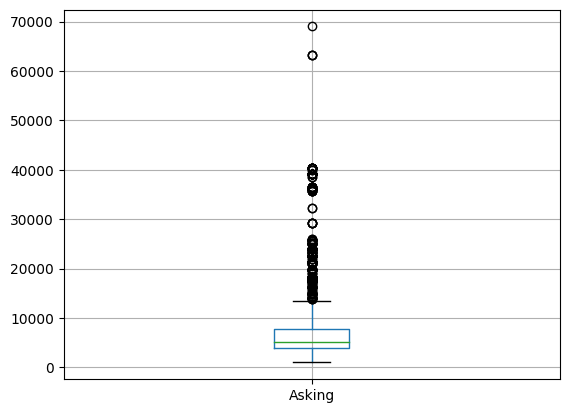

In [ ]:
df_rent.boxplot(column=['Asking'])

In [ ]:
df_rent = df_rent[(np.abs(stats.zscore(df_rent["Asking"])) < 3)]

## Categorical Variables

In [ ]:
from datetime import datetime
cat_vars = ['Property Name', 'Lease Term', 'District', 'Room Type', 'Developer', 'Trains (MRT & LRT)', 'Neighborhood']
other_vars = ['Address', 'Property', "Date Listed"] #"Condominium Name"

# convert all categorical variables
for cat_var in cat_vars:
  df_rent = pd.concat([df_rent, pd.get_dummies(df_rent[cat_var])], axis=1)

## New Variables from Date

In [ ]:
df_rent["Date Listed"] = df_rent.apply(lambda x: datetime.strptime(x["Date Listed"], '%Y-%m-%d %H:%M:%S'), axis=1)
df_rent["Day Listed"] = df_rent.apply(lambda x: x["Date Listed"].day, axis=1)
df_rent["Month Listed"] = df_rent.apply(lambda x: x["Date Listed"].month, axis=1)
df_rent["Year Listed"] = df_rent.apply(lambda x: x["Date Listed"].year, axis=1)
df_rent["Hour Listed"] = df_rent.apply(lambda x: x["Date Listed"].hour, axis=1)

# # drop all unnecessary columns
drop_columns = cat_vars + other_vars
df_rent = df_rent.drop(drop_columns, axis=1)
df_rent

,Bathrooms,Tenure,No. of Units,Size,Bedrooms,Built Year,Primary Schools,Groceries & Supermarts,Shopping Malls,Asking,...,"WOODLEIGH MRT,NE11","YEW TEE MRT,NS5","YIO CHU KANG MRT,NS15","YISHUN MRT,NS13",Big,Small,Day Listed,Month Listed,Year Listed,Hour Listed
0,1.0,99,1206.0,646,2.0,2022,0.60,0.44,0.79,5750.0,...,0,0,0,0,1,0,30,1,2023,14
1,2.0,99,1206.0,1055,3.0,2022,0.60,0.44,0.79,5750.0,...,0,0,0,0,1,0,1,4,2023,6
2,2.0,99,1206.0,764,2.0,2022,0.60,0.44,0.79,5750.0,...,0,0,0,0,1,0,23,12,2022,15
3,1.0,99,1206.0,646,2.0,2022,0.60,0.44,0.79,5750.0,...,0,0,0,0,1,0,7,2,2023,3
4,2.0,99,1206.0,1015,4.0,2022,0.60,0.44,0.79,5750.0,...,0,0,0,0,1,0,29,1,2023,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3868,1.0,999,215.0,200,1.0,1994,0.95,0.32,0.40,2625.0,...,0,0,0,0,0,1,7,9,2022,0
3869,1.0,99,689.0,431,1.0,2014,0.45,0.49,0.86,3000.0,...,0,0,0,0,1,0,17,3,2023,2
3870,3.0,99,686.0,936,2.0,1997,0.66,0.23,0.56,5000.0,...,0,0,0,0,1,0,29,1,2023,14
3871,3.0,999,77.0,1292,3.0,2011,0.76,0.42,0.43,6800.0,...,0,0,0,0,0,1,13,3,2023,16


## Clean Feature Names

In [ ]:
import re

# replace special characters with underscores --> cos of the 2 years vs 2+ years
df_rent.columns = [re.sub(r'[^\w\s]+', '_', c) for c in df_rent.columns]

# replace space with underscore
df_rent.columns = df_rent.columns.str.replace(' ', '_')
df_rent.columns

Index(['Bathrooms', 'Tenure', 'No__of_Units', 'Size', 'Bedrooms', 'Built_Year',
       'Primary_Schools', 'Groceries___Supermarts', 'Shopping_Malls', 'Asking',
       ...
       'WOODLEIGH_MRT_NE11', 'YEW_TEE_MRT_NS5', 'YIO_CHU_KANG_MRT_NS15',
       'YISHUN_MRT_NS13', 'Big', 'Small', 'Day_Listed', 'Month_Listed',
       'Year_Listed', 'Hour_Listed'],
      dtype='object', length=1322)

## Logarithmic

In [ ]:
import numpy as np
from scipy import stats

# Load your data and split into features and target variable
X = df_rent[df_rent.columns[~df_rent.columns.isin(["Asking"])]]
y = df_rent[['Asking']]

# Test for normality using the Shapiro-Wilk test
stat, p = stats.shapiro(y)
print('Shapiro-Wilk test: Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
    print('The dependent variable is normally distributed (fail to reject H0)')
else:
    print('The dependent variable is not normally distributed (reject H0)')

# Take the logarithm of the dependent variable if it is not normally distributed
if p < alpha:
    y_log = np.log(y)
    print('Logarithm transformation applied to the dependent variable')
else:
    y_log = y
    print('No logarithm transformation necessary')

Shapiro-Wilk test: Statistics=0.768, p=0.000
The dependent variable is not normally distributed (reject H0)
Logarithm transformation applied to the dependent variable


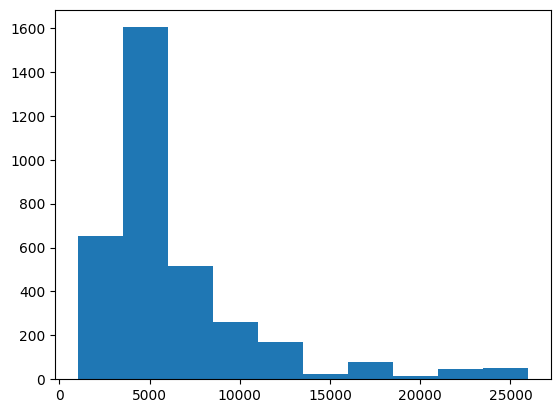

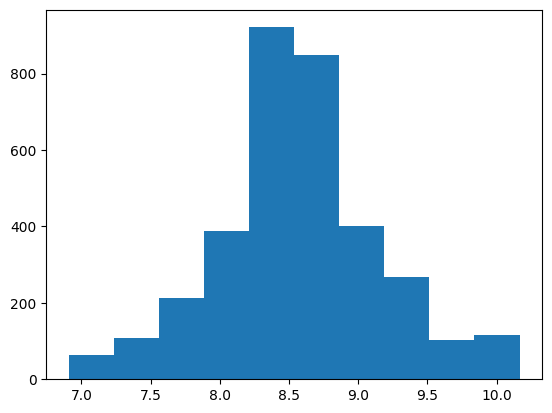

In [ ]:
import matplotlib.pyplot as plt

plt.hist(df_rent['Asking'])
plt.show()

plt.hist(np.log(df_rent['Asking']))
plt.show()

In [ ]:
df_rent["Asking_Log"] = np.log(df_rent["Asking"])
df = df_rent

## Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

X = df[df.columns[~df.columns.isin(["Asking_Log", "Asking"])]]
y_price = df[['Asking']]

train_X, test_X, train_y_price, test_y_price = train_test_split(X, y_price, test_size=0.2, random_state=42)

# Logarithmic of y 
train_y = np.log(train_y_price)
test_y = np.log(test_y_price)

# Perform PCA to reduce the dimensionality of the data
pca = PCA(n_components=5)
X_train_pca = pca.fit_transform(train_X)
X_test_pca = pca.transform(test_X)

## Error Metric

RMSE gives larger penalization to big prediction error by square it while MAE treats all errors the same.

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np

def update_score(df_score, model, y_test, y_pred_test, test_X):
# Store results as dataframe
  new_row = {'Model': model,
            'R^2':r2_score(y_test, y_pred_test),
            'Adjusted R^2':(1 - (1-r2_score(y_test, y_pred_test))*(len(y_test)-1)/(len(y_test)-test_X.shape[1]-1)),
            'MAE':mean_absolute_error(y_test, y_pred_test),
            'MSE':mean_squared_error(y_test, y_pred_test),
            'RMSE':np.sqrt(mean_squared_error(y_test, y_pred_test))}
  df_score.loc[len(df_score)] = new_row
  return df_score

df_score = pd.DataFrame(columns=['Model', 'R^2', 'Adjusted R^2', 'MAE', 'MSE', 'RMSE'])

# Group 1: Linear Regression Family

In [ ]:
import statsmodels.api as sm

model = sm.OLS(train_y, sm.add_constant(train_X)).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Asking   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                     30.67
Date:                Thu, 06 Apr 2023   Prob (F-statistic):          2.03e-266
Time:                        06:52:57   Log-Likelihood:                 689.47
No. Observations:                1063   AIC:                            -454.9
Df Residuals:                     601   BIC:                             1841.
Df Model:                         461                                         
Covariance Type:            nonrobust                                         
                                                                                                   coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------

In [ ]:
pred_y = model.predict(sm.add_constant(test_X))
df_score = update_score(df_score, "Linear Regression", test_y, pred_y, test_X)
df_score

,Model,R^2,Adjusted R^2,MAE,MSE,RMSE
0,Linear Regression,0.678755,1.116457,0.200783,0.121318,0.348307


In [ ]:
pred_y

1203     9.210525
137      7.173400
659      7.732003
199      8.471637
81       8.630971
          ...    
1145    10.075633
689      7.354685
1422     9.604705
740      8.123419
1782     8.203630
Length: 266, dtype: float64

### Residual Plot
Now let's plot the Residuals, i.e. $e_i = y_i -\hat{y}_i$, with respect to the predicted values $\hat{y}_i$. Ideally, this should look like a random scatter plot with zero mean and constant variance for all values of $\hat{y}_i$. This comes from the following two assumptions imposed in SLR
+ $e_i$ should be independent of feature $x_i$ and hence from $\hat{y_i}$
+ $e_i$ as a random variable should have constant variance over all the observations $i$.

In [ ]:
import seaborn as sns
sns.set_theme()
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [ ]:
# # sns.residplot(x=lin.fittedvalues, y=lin.resid, lowess=True)
# # plt.xlabel('ypred')
# # plt.ylabel('residuals')

# y_pred_train = model.predict(sm.add_constant(train_X)).to_frame(name="Asking_Log")

# # Residual vs fit plot
# plt.scatter(y_pred_train, train_y)
# plt.title("Residual vs Fit Plot")
# plt.xlabel("Predicted")
# plt.ylabel("Residuals")
# plt.show()

# # Normal Error
# sns.histplot(train_y - y_pred_train)
# plt.title("Normality of Residuals")
# plt.xlabel("Residuals")
# plt.ylabel("Frequency")
# plt.show()

# # # MultiCollinearity
# # corrMatrix = train_X.corr()
# # sns.heatmap(corrMatrix, annot=True)
# # plt.show()

# # Linearity
# # Independence

### Explore Features

- Multiplicative Interaction eg. A * B
- Vectorized Function eg. np.log()

https://www.statsmodels.org/stable/examples/notebooks/generated/formulas.html


In [ ]:
# from statsmodels.formula.api import ols

# poly2 = ols(formula='Price ~ horsepower + I(horsepower**2)', data=df).fit()

### Lasso Regression

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

# model_lasso = Lasso(alpha=0.01)
# model_lasso.fit(train_X, train_y) 

# pred_test_lasso= model_lasso.predict(test_X)
# df_score = update_score(df_score, "Lasso Regression", test_y, pred_test_lasso, test_X)
# df_score

model_lasso = Lasso()

# define the grid of hyperparameters to search over
lasso_param_grid = {
    "alpha": [0.001, 0.01, 0.1, 1, 10, 100],
    "max_iter": [1000, 5000, 10000],
}

# perform a grid search with cross-validation to find the best hyperparameters
lasso_grid = GridSearchCV(estimator=model_lasso, param_grid=lasso_param_grid, cv=5, scoring="neg_root_mean_squared_error")
lasso_grid.fit(train_X, train_y)

# get the best hyperparameters and model
print(lasso_grid.best_params_)
best_lasso = lasso_grid.best_estimator_

pred_test_lasso = best_lasso.predict(test_X)
df_score = update_score(df_score, "Lasso Regression", test_y, pred_test_lasso, test_X)
df_score

{'alpha': 0.001, 'max_iter': 1000}


,Model,R^2,Adjusted R^2,MAE,MSE,RMSE
0,Linear Regression,0.678755,1.116457,0.200783,0.121318,0.348307
1,Lasso Regression,0.824385,1.063663,0.194581,0.066321,0.257529
2,Lasso Regression,0.824385,1.063663,0.194581,0.066321,0.257529


### Ridge Regression

In [ ]:
from sklearn.linear_model import Ridge

# model_ridge = Ridge(alpha=0.01)
# model_ridge.fit(train_X, train_y) 
# # pred_train_rr= rr.predict(train_X)
# # df_score = update_score(df_score, "Ridge Regression Train", train_y, pred_train_rr, train_X)

# pred_test_rr= model_ridge.predict(test_X)
# df_score = update_score(df_score, "Ridge Regression", test_y, pred_test_rr, test_X)
# df_score

model_ridge = Ridge()

# define the grid of hyperparameters to search over
ridge_param_grid = {
    "alpha": [0.001, 0.01, 0.1, 1, 10, 100],
    "max_iter": [1000, 5000, 10000],
}

# perform a grid search with cross-validation to find the best hyperparameters
ridge_grid = GridSearchCV(estimator=model_ridge, param_grid=ridge_param_grid, cv=5, scoring="neg_root_mean_squared_error")
ridge_grid.fit(train_X, train_y)

# get the best hyperparameters and model
print(ridge_grid.best_params_)
best_ridge = ridge_grid.best_estimator_

pred_test_ridge = best_ridge.predict(test_X)
df_score = update_score(df_score, "Ridge Regression", test_y, pred_test_ridge, test_X)
df_score

{'alpha': 10, 'max_iter': 1000}


,Model,R^2,Adjusted R^2,MAE,MSE,RMSE
0,Linear Regression,0.678755,1.116457,0.200783,0.121318,0.348307
1,Lasso Regression,0.824385,1.063663,0.194581,0.066321,0.257529
2,Lasso Regression,0.824385,1.063663,0.194581,0.066321,0.257529
3,Ridge Regression,0.837724,1.058828,0.186784,0.061283,0.247555


## Elastic Net Regression

In [ ]:
from sklearn.linear_model import ElasticNet

model_elastic = ElasticNet()

# define the grid of hyperparameters to search over
elastic_param_grid = {
    'alpha': [0.001, 0.01, 0.1, 1, 10],
    'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9],
}

# perform a grid search over the hyperparameters using 5-fold cross-validation
elastic_grid = GridSearchCV(estimator=model_elastic, param_grid=elastic_param_grid, cv=5, scoring="neg_root_mean_squared_error")
elastic_grid.fit(train_X, train_y)

# get the best hyperparameters and model
print(elastic_grid.best_params_)
best_elastic = elastic_grid.best_estimator_

pred_test_elastic = best_elastic.predict(test_X)
df_score = update_score(df_score, "ElasticNet Regression", test_y, pred_test_elastic, test_X)
df_score

{'alpha': 0.001, 'l1_ratio': 0.5}


,Model,R^2,Adjusted R^2,MAE,MSE,RMSE
0,Linear Regression,0.678755,1.116457,0.200783,0.121318,0.348307
1,Lasso Regression,0.824385,1.063663,0.194581,0.066321,0.257529
2,Lasso Regression,0.824385,1.063663,0.194581,0.066321,0.257529
3,Ridge Regression,0.837724,1.058828,0.186784,0.061283,0.247555
4,ElasticNet Regression,0.833022,1.060533,0.190890,0.063059,0.251116


# Group 2: Boosting Algorithms

## XGBoost

In [ ]:
from xgboost import XGBRegressor
import xgboost as xgb

# Create an instance of the XGBRegressor and fit the data (takes 1h to run)
xgb_param_grid = {"learning_rate": [0.05, 0.1, 0.2], # Step size shrinkage used in update to prevents overfitting.
                  "max_depth"        : [8, 9, 10], # Maximum depth of a tree. 
                  "min_child_weight" : [1, 3, 5], # Minimum number of instances required in a child node
                  "gamma"            : [0.0, 0.1, 0.2], # Minimum loss reduction required to make a further partition on a leaf node of the tree.
                  "colsample_bytree" : [0.3, 0.4, 0.6] # Number of features supplied to a tree
                  }

xgb_reg = xgb.XGBRegressor(seed = 42, objective ='reg:squarederror')

xgb_reg_grid = GridSearchCV(estimator = xgb_reg, param_grid = xgb_param_grid, cv=5, n_jobs=-1, verbose=2, scoring="neg_root_mean_squared_error") 

xgb_reg_grid.fit(train_X, train_y)
xgb_reg_grid.best_params_
best_xgb_reg = xgb_reg_grid.best_estimator_

pred_test_xgb = best_xgb_reg.predict(test_X)
df_score = update_score(df_score, "XGB Regressor", test_y, pred_test_xgb, test_X)
df_score

# xgb = XGBRegressor()
# xgb.fit(X_train_pca, train_y)
# xgb.score(X_test_pca, test_y)
# # df_score = update_score(df_score, "XGB Regressor", test_y, pred_test_pcaxgb, test_X)
# # df_score

Fitting 5 folds for each of 243 candidates, totalling 1215 fits


KeyboardInterrupt: ignored

In [ ]:
xgb_reg_grid.best_params_

{'colsample_bytree': 0.4,
 'gamma': 0.0,
 'learning_rate': 0.1,
 'max_depth': 10,
 'min_child_weight': 5}

In [ ]:
xgb_features = pd.DataFrame([train_X.columns, best_xgb_reg.feature_importances_]).T
xgb_features = xgb_features.rename(columns={0: 'Feature', 1: 'Importance Score'})
xgb_features.sort_values(by = 'Importance Score', ascending = False).head(15)

,Feature,Importance Score
187,Marina_Bay_Residences,0.138086
904,DOWNTOWN_MRT_DT17,0.112005
483,Entire_Unit,0.065968
4,Size,0.049466
458,D10,0.047645
945,ORCHARD_BOULEVARD_MRT_TE13,0.038522
672,Keppel_Land__Hong_Kong_Land__Cheung_Kong_Holdi...,0.029228
743,Pontiac_Land_Pte_Ltd,0.027856
765,Regency_Park_Pte_Ltd,0.025497
481,D9,0.024168


## LightGBM

In [ ]:
import lightgbm as lgb

# define the LightGBM model
model = lgb.LGBMRegressor()

# Define the parameter grid for hyperparameter tuning
lgb_param_grid = {
    'num_leaves': [20, 30, 50],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 200, 500],
    'max_depth': [-1, 5, 10]
}

# Perform hyperparameter tuning using GridSearchCV
lgb_grid = GridSearchCV(model, lgb_param_grid, scoring='neg_mean_absolute_error', cv=5)
lgb_grid.fit(train_X, train_y)

lgb_grid.best_params_
best_lgb = lgb_grid.best_estimator_

pred_test_lgb = best_lgb.predict(test_X)
df_score = update_score(df_score, "LGB Regressor", test_y, pred_test_lgb, test_X)
df_score

,Model,R^2,Adjusted R^2,MAE,MSE,RMSE
0,Linear Regression,0.678755,1.116457,0.200783,0.121318,0.348307
1,Lasso Regression,0.824385,1.063663,0.194581,0.066321,0.257529
2,Lasso Regression,0.824385,1.063663,0.194581,0.066321,0.257529
3,Ridge Regression,0.837724,1.058828,0.186784,0.061283,0.247555
4,ElasticNet Regression,0.833022,1.060533,0.190890,0.063059,0.251116
5,XGB Regressor,0.864200,1.049230,0.155833,0.051285,0.226462
6,LGB Regressor,0.854288,1.052823,0.163346,0.055028,0.234581


## CatBoost

In [ ]:
# Create CatBoost pool objects
train_pool = Pool(train_X, train_y)
val_pool = Pool(X_val, y_val)

# Create CatBoost model
model_Cat = CatBoostRegressor(loss_function='MAE')

# Define parameter grid to search over
cat_param_grid = {'learning_rate': [0.05, 0.1, 0.15],
                  'depth': [4, 6, 8]}

# Optimize parameters using GridSearchCV
cat_grid = GridSearchCV(model, param_grid=cat_param_grid, cv=3)
cat_grid.fit(train_X, train_y)

# Print best parameters
print("Best parameters: ", cat_grid.best_params_)

best_cat = cat_grid.best_estimator_

pred_test_cat = best_cat.predict(test_X)
df_score = update_score(df_score, "LGB Regressor", test_y, pred_test_cat, test_X)
df_score

# Model 4: Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Create the parameter grid for GridSearchCV
rf_param_grid = {
    'max_depth': [80, 90, 100], # Maximum number of levels in each decision tree
    'max_features': [2, 3], # Maximum number of features considered for splitting a node
    'min_samples_leaf': [1, 3, 4, 5], # Minimum number of data points allowed in a leaf node
    'n_estimators': [100, 300, 600] # Number of trees in the forest
}

rf_reg = RandomForestRegressor(random_state = 42)
rf_grid = GridSearchCV(estimator = rf_reg, param_grid = rf_param_grid, cv=5, n_jobs=-1, verbose=2)

In [ ]:
rf_grid.fit(train_X, train_y)
rf_best = rf_grid.best_estimator_
rf_grid.best_params_

Fitting 5 folds for each of 72 candidates, totalling 360 fits


/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_search.py:909: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


{'max_depth': 100,
 'max_features': 3,
 'min_samples_leaf': 1,
 'n_estimators': 600}

In [ ]:
pred_test_rf = rf_best.predict(test_X)
df_score = update_score(df_score, "Random Forest Regressor", test_y, pred_test_rf, test_X)
df_score

,Model,R^2,Adjusted R^2,MAE,MSE,RMSE
0,Linear Regression,0.678755,1.116457,0.200783,0.121318,0.348307
1,Lasso Regression,0.824385,1.063663,0.194581,0.066321,0.257529
2,Lasso Regression,0.824385,1.063663,0.194581,0.066321,0.257529
3,Ridge Regression,0.837724,1.058828,0.186784,0.061283,0.247555
4,ElasticNet Regression,0.833022,1.060533,0.190890,0.063059,0.251116
5,XGB Regressor,0.864200,1.049230,0.155833,0.051285,0.226462
6,LGB Regressor,0.854288,1.052823,0.163346,0.055028,0.234581
7,Random Forest Regressor,0.838705,1.058472,0.166021,0.060913,0.246806


In [ ]:
rf_features = pd.DataFrame([train_X.columns, rf_best.feature_importances_]).T
rf_features = rf_features.rename(columns={0: 'Feature', 1: 'Importance Score'})
rf_features.sort_values(by = 'Importance Score', ascending = False)

,Feature,Importance Score
4,Size,0.0835
3,Bedrooms,0.051803
5,Bathrooms,0.040934
6,Primary_Schools,0.036243
483,Entire_Unit,0.033303
...,...,...
576,Dover_Rise_Ltd___Whitewater_Properties_Pte_Ltd,0.0
598,First_Capital_Corporation,0.0
649,Holland_Village_Development_Pte_Ltd,0.0
654,Hong_Leong_Holdings_Ltd___City_Development_Ltd,0.0


# Model 5: SVM

In [ ]:
from sklearn import svm
from sklearn.metrics import mean_absolute_error

model_svm = svm.SVR()
svm_param_grid = {'kernel': ('linear', 'poly', 'rbf'), 'C': [0.1, 1, 10]}
svm_grid = GridSearchCV(model_svm, svm_param_grid, scoring='neg_mean_absolute_error', cv=5)

In [ ]:
svm_grid.fit(train_X, train_y)
svm_best = svm_grid.best_estimator_
svm_grid.best_params_

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example 

{'C': 10, 'kernel': 'rbf'}

In [ ]:
pred_test_svm = svm_best.predict(test_X)
df_score = update_score(df_score, "Support Vector Machines (SVM)", test_y, pred_test_svm, test_X)
df_score

,Model,R^2,Adjusted R^2,MAE,MSE,RMSE
0,Linear Regression,0.678755,1.116457,0.200783,0.121318,0.348307
1,Lasso Regression,0.824385,1.063663,0.194581,0.066321,0.257529
2,Lasso Regression,0.824385,1.063663,0.194581,0.066321,0.257529
3,Ridge Regression,0.837724,1.058828,0.186784,0.061283,0.247555
4,ElasticNet Regression,0.833022,1.060533,0.190890,0.063059,0.251116
5,XGB Regressor,0.864200,1.049230,0.155833,0.051285,0.226462
6,LGB Regressor,0.854288,1.052823,0.163346,0.055028,0.234581
7,Random Forest Regressor,0.838705,1.058472,0.166021,0.060913,0.246806
8,Support Vector Machines (SVM),0.691738,1.111750,0.251707,0.116415,0.341197


# Model 6: Neural Network 


Try Grid Search

In [ ]:
!pip install --upgrade tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.optimizers import Adam, SGD
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, regularizers

In [ ]:
def create_model(optimizer='adam', learning_rate=0.001):
  # try pruning
    model = keras.Sequential([
        layers.Dense(128, activation='relu', input_shape=(train_X.shape[1],)),
        layers.Dense(64, activation='relu'),
        layers.Dense(1)
    ])
    opt = getattr(tf.optimizers, optimizer)(learning_rate=learning_rate)
    model.compile(optimizer=opt, loss='mean_absolute_error')
    return model

# define the parameter grid for the grid search
param_grid = {
    'optimizer': ['SGD', 'Adam'],
    'learning_rate': [0.01, 0.1],
    'batch_size': [16, 32]
}

# create a KerasRegressor object to use with GridSearchCV
model = KerasRegressor(build_fn=create_model, verbose=0)

# create a GridSearchCV object and fit the data
nn_grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1)
nn_grid.fit(train_X, train_y)

nn_best = nn_grid.best_estimator_
nn_grid.best_params_

pred_test_nn = nn_best.predict(test_X)
df_score = update_score(df_score, "Neural Network", test_y, pred_test_nn, test_X)
df_score

<ipython-input-23-cd7daf98734f>:22: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasRegressor(build_fn=create_model, verbose=0)
/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_search.py:952: UserWarning: One or more of the test scores are non-finite: [-4.52075033e+01 -1.80800527e+00             nan -8.29977179e-01
 -1.15335705e+17 -1.78317771e+00 -5.51823318e+11 -1.28662101e+01]
  warnings.warn(


,Model,R^2,Adjusted R^2,MAE,MSE,RMSE
0,Neural Network,-65.311790,25.039158,4.966387,25.042649,5.004263
1,Neural Network,-4.138901,2.862940,0.937179,1.940706,1.393092
2,Neural Network,-0.801390,1.653035,0.673136,0.680295,0.824800


In [ ]:
nn_grid.best_params_

{'batch_size': 32, 'epochs': 100, 'learning_rate': 0.01, 'optimizer': 'Adam'}

Use Best Params --> plot the loss against epochs to find optimal point

In [ ]:
random.seed(2023)
model_nn = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(train_X.shape[1],)),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
])

opt = Adam(learning_rate=0.001)
model_nn.compile(optimizer=opt, loss='mean_absolute_error')
history = model_nn.fit(train_X, train_y, epochs=100, batch_size=32, validation_split=0.2)

train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(train_loss) + 1)

Epoch 1/100
27/27 [==============================] - 6s 16ms/step - loss: 19.6029 - val_loss: 14.7963
Epoch 2/100
27/27 [==============================] - 0s 8ms/step - loss: 5.4775 - val_loss: 3.9315
Epoch 3/100
27/27 [==============================] - 0s 12ms/step - loss: 5.0854 - val_loss: 8.1375
Epoch 4/100
27/27 [==============================] - 0s 7ms/step - loss: 7.9968 - val_loss: 10.0332
Epoch 5/100
27/27 [==============================] - 0s 4ms/step - loss: 4.3549 - val_loss: 3.6656
Epoch 6/100
27/27 [==============================] - 0s 4ms/step - loss: 3.8812 - val_loss: 1.3999
Epoch 7/100
27/27 [==============================] - 0s 4ms/step - loss: 3.0171 - val_loss: 4.7776
Epoch 8/100
27/27 [==============================] - 0s 5ms/step - loss: 3.3368 - val_loss: 3.6419
Epoch 9/100
27/27 [==============================] - 0s 5ms/step - loss: 3.1212 - val_loss: 4.6202
Epoch 10/100
27/27 [==============================] - 0s 5ms/step - loss: 3.5342 - val_loss: 1.6465
Epoc

<ipython-input-80-7fb551fb2de2>:1: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(epochs[1:], train_loss[1:], 'b', label='Training loss', color="blue")
<ipython-input-80-7fb551fb2de2>:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(epochs[1:], val_loss[1:], 'b', label='Validation loss', color="red")


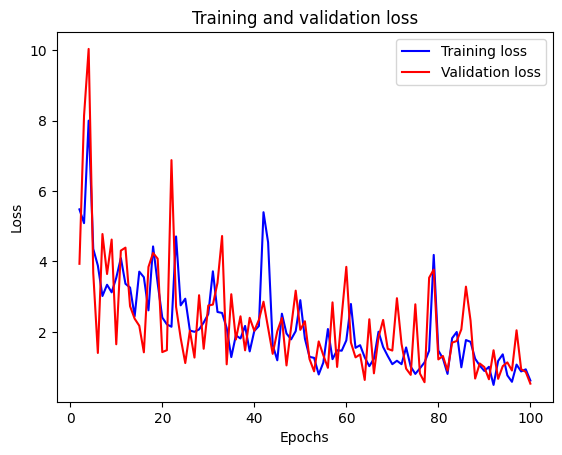

In [ ]:
plt.plot(epochs[1:], train_loss[1:], 'b', label='Training loss', color="blue")
plt.plot(epochs[1:], val_loss[1:], 'b', label='Validation loss', color="red")
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
model_nn = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(train_X.shape[1],)),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
])

model_nn.compile(optimizer='adam', loss='mean_absolute_error')
model_nn.fit(train_X, train_y, epochs=200, batch_size=32, validation_split=0.2)

Epoch 1/200
27/27 [==============================] - 2s 19ms/step - loss: 69.5954 - val_loss: 20.3685
Epoch 2/200
27/27 [==============================] - 0s 7ms/step - loss: 7.9728 - val_loss: 4.9598
Epoch 3/200
27/27 [==============================] - 0s 10ms/step - loss: 2.3251 - val_loss: 2.4491
Epoch 4/200
27/27 [==============================] - 0s 12ms/step - loss: 2.1740 - val_loss: 2.8590
Epoch 5/200
27/27 [==============================] - 0s 9ms/step - loss: 1.6558 - val_loss: 1.1344
Epoch 6/200
27/27 [==============================] - 0s 11ms/step - loss: 2.0175 - val_loss: 3.3103
Epoch 7/200
27/27 [==============================] - 0s 7ms/step - loss: 3.2772 - val_loss: 1.8906
Epoch 8/200
27/27 [==============================] - 0s 7ms/step - loss: 2.0263 - val_loss: 1.8971
Epoch 9/200
27/27 [==============================] - 0s 6ms/step - loss: 1.5886 - val_loss: 2.6652
Epoch 10/200
27/27 [==============================] - 0s 6ms/step - loss: 2.0310 - val_loss: 6.1894
Epo

In [ ]:
# Use the model to make predictions on the test data
pred_test_nn = model_nn.predict(test_X)
df_score = update_score(df_score, "Neural Network w reg", test_y, pred_test_nn, test_X)
df_score

9/9 [==============================] - 0s 2ms/step


,Model,R^2,Adjusted R^2,MAE,MSE,RMSE
0,Linear Regression,0.678755,1.116457,0.200783,0.121318,0.348307
1,Lasso Regression,0.735672,1.095823,0.237931,0.099823,0.315948
2,Ridge Regression,0.771159,1.082959,0.179136,0.086422,0.293976
3,XGB Regressor,0.763702,1.085662,0.216036,0.089238,0.298727
4,Random Forest Regressor,0.840546,1.057805,0.164731,0.060218,0.245393
5,Support Vector Machines (SVM),0.691680,1.111771,0.251733,0.116437,0.341229
6,Neural Network w reg,-0.544584,1.559938,0.676168,0.583312,0.763749
7,Neural Network w reg,0.033418,1.350402,0.428985,0.365030,0.604177


In [ ]:
df["Asking"].mean()

6677.986982693754

# Final Chosen Model

## Experiment with PCA


## Experiment with log vs no log

Calculate Rental Price Error

In [ ]:
pred_test_ridge_price = np.exp(pred_test_ridge)
error = np.abs(test_y_price - pred_test_ridge_price)
np.mean(error)

/usr/local/lib/python3.9/dist-packages/numpy/core/fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


Asking    1139.102331
dtype: float64

In [ ]:
test_y_price.squeeze() - pred_test_xgb_price

1203     2204.274414
137      -287.140869
659       443.784912
199        70.520787
81      -1773.117025
            ...     
1145    -2262.662109
689     -1768.174805
1422    15974.915039
740      -177.198242
1782     -237.773926
Name: Asking, Length: 266, dtype: float64

In [ ]:
pred_test_xgb_price = np.exp(pred_test_xgb)
error = np.abs(test_y_price.squeeze() - pred_test_xgb_price)
np.mean(error)

966.8331373652137